In [1]:
import os
import sys
import csv
import re
import math
import pandas as pd
import os
import seaborn as sns
from glob import glob
import cv2
# import pdb

import librosa
import os
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import matplotlib.style as ms
from tqdm import tqdm
import pickle

from moviepy.editor import *

import IPython.display
import librosa.display
ms.use('seaborn-muted')
%matplotlib inline


In [2]:
df_iemocap = pd.read_csv("../small_data/preprocessed_data/df_iemocap.csv")

In [3]:
df_iemocap.head()

,start_time,end_time,file_path,emotion,session,sex
0,6.2901,8.2357,/Users/grigorkeropyan/Desktop/YSU_thesis/small...,neu,0,F
1,10.0100,11.3925,/Users/grigorkeropyan/Desktop/YSU_thesis/small...,neu,0,F
2,14.8872,18.0175,/Users/grigorkeropyan/Desktop/YSU_thesis/small...,neu,0,F
3,19.2900,20.7875,/Users/grigorkeropyan/Desktop/YSU_thesis/small...,xxx,0,F
4,21.3257,24.7400,/Users/grigorkeropyan/Desktop/YSU_thesis/small...,xxx,0,F


In [4]:
set(df_iemocap.sex)

{'F', 'M'}

In [5]:
df_ravdess = pd.read_csv('../small_data/preprocessed_data/df_ravdess.csv')

In [6]:
df_ravdess.head()

,file_path,emotion,actor,sex
0,/Users/grigorkeropyan/Desktop/YSU_thesis/small...,hap,10,F
1,/Users/grigorkeropyan/Desktop/YSU_thesis/small...,hap,10,F
2,/Users/grigorkeropyan/Desktop/YSU_thesis/small...,calm,10,F
3,/Users/grigorkeropyan/Desktop/YSU_thesis/small...,neu,10,F
4,/Users/grigorkeropyan/Desktop/YSU_thesis/small...,calm,10,F


In [ ]:
df_enterface = pd.read_csv('../small_data/preprocessed_data/df_enterface.csv')

In [ ]:
df_enterface.head()

In [ ]:
df_iemocap.file_path[4]

In [ ]:
df_ravdess.file_path[4]

In [ ]:
df_enterface.file_path[4]

In [ ]:
df_enterface.columns

In [ ]:
# filtering and combining some emotions!
current_emos = ['sad', 'neu', 'hap', 'ang', 
          'fru', 'exc', 'oth', 'dis', 'fea', 'sur']

final_emos = ['sad', 'neu', 'hap', 'ang', 'fru', 'exc', 'oth']

df_iemocap = df_iemocap.loc[df_iemocap.emotion.isin(current_emos)]
df_enterface = df_enterface.loc[df_enterface.emotion.isin(current_emos)]
df_ravdess = df_ravdess.loc[df_ravdess.emotion.isin(current_emos)]


df_iemocap['emotion'] = df_iemocap['emotion'].replace({'sur': 'oth', 'fea': 'oth', 'dis': 'oth'})
df_enterface['emotion'] = df_enterface['emotion'].replace({'sur': 'oth', 'fea': 'oth', 'dis': 'oth'})
df_ravdess['emotion'] = df_ravdess['emotion'].replace({'sur': 'oth', 'fea': 'oth', 'dis': 'oth'})


In [ ]:
ems = {
    'sad': 1491,
    'dis': 409,
    'neu': 1804,
    'hap': 999,
    'ang': 1510,
    'fea': 447,
    'sur': 514,
    'calm': 192,
    'fru': 1849,
    'xxx': 2507,
    'exc': 1041,
    'oth': 3
}
sns.barplot(list(ems.keys()), np.array(list(ems.values()))*100/sum(list(ems.values())))

In [ ]:
ems = {
    'sad': 1491,
    'dis': 409,
    'neu': 1804,
    'hap': 999,
    'ang': 1510,
    'fea': 447,
    'sur': 514,
#     'calm': 192,
    'fru': 1849,
#     'xxx': 2507,
    'exc': 1041,
#     'oth': 3
}
sns.barplot(list(ems.keys()), np.array(list(ems.values()))*100/sum(list(ems.values())))

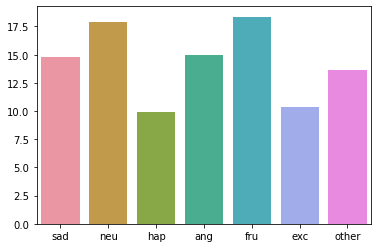

In [8]:
ems = {
    'sad': 1491,
#     'dis': 409,
    'neu': 1804,
    'hap': 999,
    'ang': 1510,
#     'fea': 447,
#     'sur': 514,
    'fru': 1849,
    'exc': 1041,
    'other': 3 + 514 + 447 + 409
}
sns.barplot(list(ems.keys()), np.array(list(ems.values()))*100/sum(list(ems.values())))

In [ ]:
for i in range(int(length//3)):
    vi = vid.subclip(3*i, 3*i + 3)
    vi.write_videofile("v" + str(i) + ".mp4",
                    codec='libx264',
                    audio_codec='aac',
                    temp_audiofile='temp-audio.m4a',
                    remove_temp=True)
if length > 3*int(length//3) + 0.9:
    vi = vid.subclip(3*int(length//3))
    vi.write_videofile("v" + ".mp4",
                        codec='libx264',
                        audio_codec='aac',
                        temp_audiofile='temp-audio.m4a',
                        remove_temp=True)

In [ ]:
def get_three_sec_videos(video_path, save_folder_path, save_name):
    vid = VideoFileClip(video_path)
    length = vid.duration
    
    for i in range(int(length//3)):
        vi = vid.subclip(3*i, 3*i + 3)
        vi.write_videofile(save_name+ "v" + str(i) + ".mp4",
                        codec='libx264',
                        audio_codec='aac',
                        temp_audiofile='temp-audio.m4a',
                        remove_temp=True)
    if length > 3*int(length//3) + 0.9:
        vi = vid.subclip(3*int(length//3))
        vi.write_videofile(save_name + "v" + ".mp4",
                            codec='libx264',
                            audio_codec='aac',
                            temp_audiofile='temp-audio.m4a',
                            remove_temp=True)

In [4]:
from preprocessing import *

In [5]:
df = df_iemocap[['file_path', 'emotion']]

In [6]:
df

,file_path,emotion
0,/Users/grigorkeropyan/Desktop/YSU_thesis/small...,neu
1,/Users/grigorkeropyan/Desktop/YSU_thesis/small...,neu
2,/Users/grigorkeropyan/Desktop/YSU_thesis/small...,neu
3,/Users/grigorkeropyan/Desktop/YSU_thesis/small...,xxx
4,/Users/grigorkeropyan/Desktop/YSU_thesis/small...,xxx
...,...,...
97,/Users/grigorkeropyan/Desktop/YSU_thesis/small...,exc
98,/Users/grigorkeropyan/Desktop/YSU_thesis/small...,exc
99,/Users/grigorkeropyan/Desktop/YSU_thesis/small...,exc
100,/Users/grigorkeropyan/Desktop/YSU_thesis/small...,exc


In [7]:
save_data_path = '/Users/grigorkeropyan/Desktop/YSU_thesis/all_data/'


In [8]:
df.file_path[1]

'/Users/grigorkeropyan/Desktop/YSU_thesis/small_data/IEMOCAP_full_release/Session1/sentences_video_audio/Ses01F_impro01/Ses01F_impro01_F001.mp4'

In [9]:
dd = prepare_whole_data(df.iloc[1:2], save_data_path, 'fff.csv')

Moviepy - Building video /Users/grigorkeropyan/Desktop/YSU_thesis/all_data/Ses01F_impro01_F001_0/Ses01F_impro01_F001_0.mp4.
MoviePy - Writing audio in temp-audio.m4a
MoviePy - Done.
Moviepy - Writing video /Users/grigorkeropyan/Desktop/YSU_thesis/all_data/Ses01F_impro01_F001_0/Ses01F_impro01_F001_0.mp4



Moviepy - Done !
Moviepy - video ready /Users/grigorkeropyan/Desktop/YSU_thesis/all_data/Ses01F_impro01_F001_0/Ses01F_impro01_F001_0.mp4
MoviePy - Writing audio in /Users/grigorkeropyan/Desktop/YSU_thesis/all_data/Ses01F_impro01_F001_0/Ses01F_impro01_F001_0.wav
MoviePy - Done.
43
29.97
Frame shape Before resize (480, 720, 3)
After (240, 360, 3)
Frame shape Before resize (480, 720, 3)
After (240, 360, 3)
Frame shape Before resize (480, 720, 3)
After (240, 360, 3)
Frame shape Before resize (480, 720, 3)
After (240, 360, 3)
Frame shape Before resize (480, 720, 3)
After (240, 360, 3)
Frame shape Before resize (480, 720, 3)
After (240, 360, 3)
Frame shape Before resize (480, 720, 3)
After (240, 360, 3)
Frame shape Before resize (480, 720, 3)
After (240, 360, 3)
Frame shape Before resize (480, 720, 3)
After (240, 360, 3)
Frame shape Before resize (480, 720, 3)
After (240, 360, 3)
Frame shape Before resize (480, 720, 3)
After (240, 360, 3)
Frame shape Before resize (480, 720, 3)
After (240, 3

In [26]:
dd

,pic_paths,npy_paths,emotion
0,/Users/grigorkeropyan/Desktop/YSU_thesis/all_d...,/Users/grigorkeropyan/Desktop/YSU_thesis/all_d...,neu


In [13]:
aa = VideoFileClip(df_iemocap.file_path[4])

In [17]:
aa.audio.write_audiofile('aaa.wav')

MoviePy - Writing audio in aaa.wav
MoviePy - Done.


In [16]:
!ls

README.md                 extracting_video_paths.py run.py
__pycache__               helpful_codes.ipynb       testing.ipynb
docs                      preprocessing.py


In [18]:
path = df_iemocap.file_path[4]

In [19]:
path

'/Users/grigorkeropyan/Desktop/YSU_thesis/small_data/IEMOCAP_full_release/Session1/sentences_video_audio/Ses01F_impro01/Ses01F_impro01_F004.mp4'

In [20]:
import subprocess

In [21]:
command = "ffmpeg -i " + path + " -ab 160k -ac 2 -ar 44100 -vn audio.wav"

subprocess.call(command, shell=True)

127

In [22]:
!ls

README.md                 extracting_video_paths.py run.py
__pycache__               helpful_codes.ipynb       testing.ipynb
docs                      preprocessing.py
